
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '99101943'
first_name = 'Matin'
last_name = 'Alinejad'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [27]:
# TODO: Write your code here
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import random
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [7]:
# TODO: Write your code here

# Load the data
file_path = 'spotify.csv'
spotify_data = pd.read_csv(file_path)

# Retain only the relevant columns
relevant_columns = [
    'track_name', 'track_popularity', 'danceability', 'energy', 'loudness', 
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_ms'
]

spotify_data_relevant = spotify_data[relevant_columns]

# Display the first few rows of the dataset to confirm the changes
spotify_data_relevant.head()

,track_name,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [8]:
# TODO: Write your code here
# Extract the features for standardization
features = spotify_data_relevant.drop(columns=['track_name'])

# Implementing the standard scaler from scratch
class StandardScalerFromScratch:
    def fit_transform(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)
        standardized_data = (data - self.means) / self.stds
        return standardized_data

# Initialize the scaler
scaler = StandardScalerFromScratch()

# Standardize the features
standardized_features = scaler.fit_transform(features)

# Create a DataFrame with the standardized features
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)

# Display the first few rows of the standardized features to confirm
standardized_features_df.head()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.941517,0.642039,1.201596,1.367103,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,0.981542,0.490404,0.643307,0.585758,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,1.101619,0.138887,1.284510,1.100073,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,0.701364,0.435264,1.278982,0.984294,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,1.061593,-0.033425,0.742804,0.685141,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

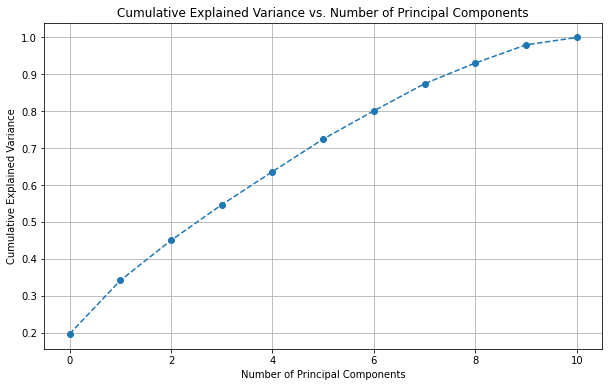

number of principal components: 9


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.462506,-1.015551,-0.477537,-1.404570,-0.431193,-0.063791,-0.229441,0.090783,0.269057
1,-1.003189,-1.205791,-0.427548,-0.510008,0.600317,-1.385407,0.900993,0.327234,-0.370865
2,-1.531951,-1.033454,-0.778677,-1.135563,-0.319060,-0.084919,0.155588,0.075204,0.282776
3,-1.536060,-0.404267,-0.953718,-0.505721,-0.570841,-0.795095,-0.590868,0.136514,-0.366956
4,-0.999110,-0.962414,-0.532783,-1.379225,-0.032636,0.255167,0.530345,0.021493,0.117847


In [16]:
# TODO: Write your code here

# Apply PCA
pca = PCA()
pca.fit(standardized_features_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance to determine the cut-off
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 90% of the variance
num_components = (cumulative_explained_variance >= 0.90).argmax() + 1
print("number of principal components:", num_components)

# Apply PCA with the determined number of components
pca = PCA(n_components = num_components)
principal_components = pca.fit_transform(standardized_features_df)

# Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Display the first few rows of the DataFrame to confirm
principal_components_df.head()

# Clustering

Implement K-means for clustering from scratch.

In [21]:
# TODO: Write your code here
import numpy as np

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
    
    def fit(self, X):
        # Randomly initialize the centroids
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.n_clusters]]
        
        for _ in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X)
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break
            self.centroids = new_centroids
    
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k] = X[self.labels == k].mean(axis=0)
        return centroids
    
    def predict(self, X):
        return self._assign_clusters(X)

# Transform principal components to numpy array
X_pca = principal_components_df.to_numpy()

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

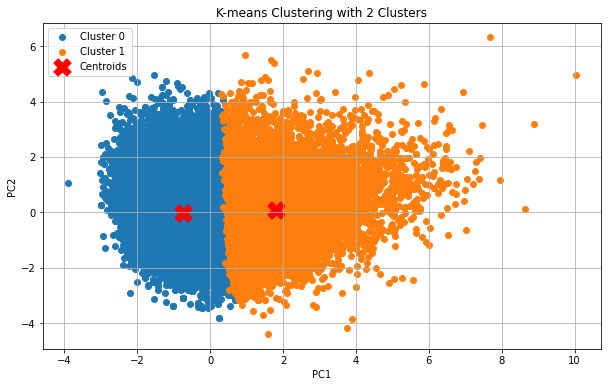

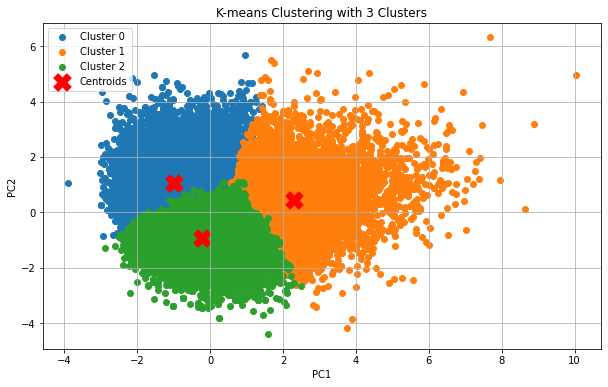

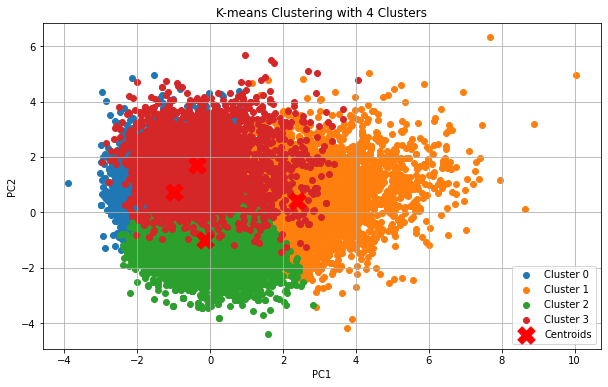

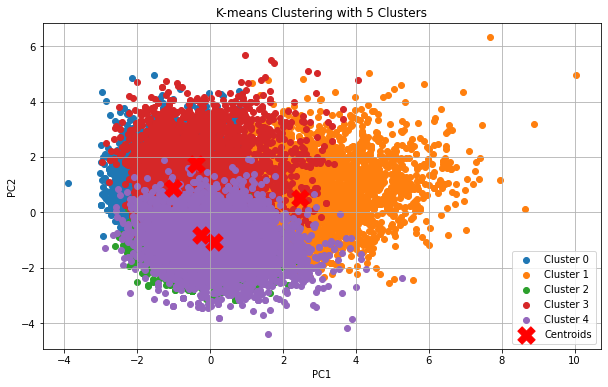

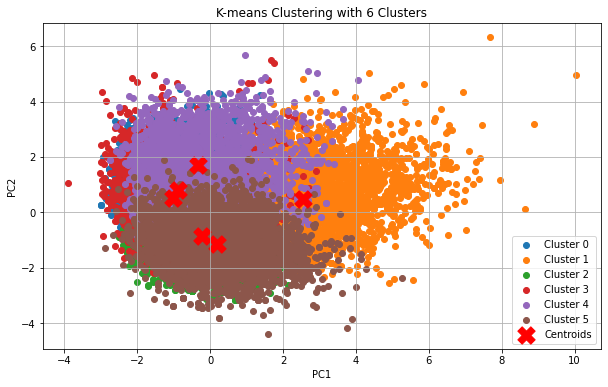

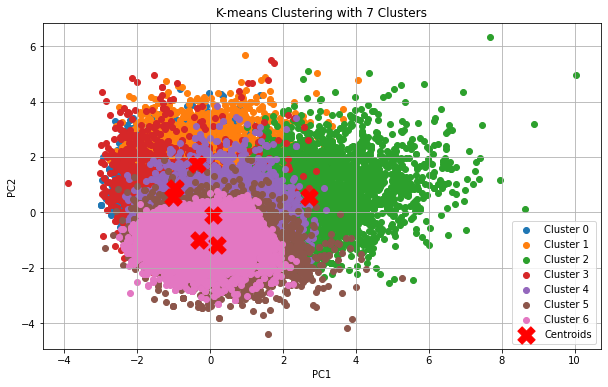

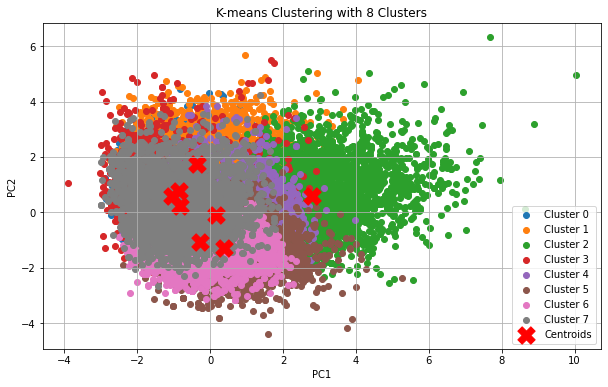

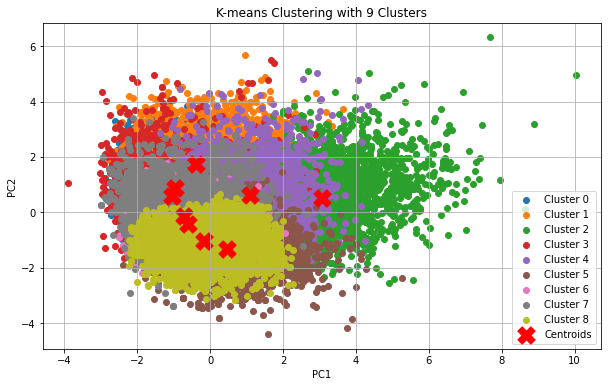

In [22]:
# TODO: Write your code here
import matplotlib.pyplot as plt

def plot_clusters(X, labels, centroids, n_clusters):
    plt.figure(figsize=(10, 6))
    for k in range(n_clusters):
        cluster = X[labels == k]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {k}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

for n_clusters in range(2, 10):
    kmeans = KMeansFromScratch(n_clusters=n_clusters)
    kmeans.fit(X_pca)
    plot_clusters(X_pca, kmeans.labels, kmeans.centroids, n_clusters)

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

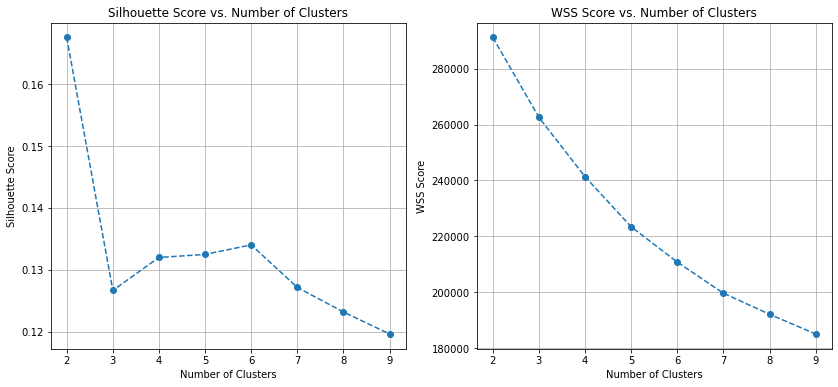

In [23]:
# TODO: Write your code here

def calculate_wss(X, labels, centroids):
    wss = 0
    for k in range(centroids.shape[0]):
        cluster = X[labels == k]
        wss += np.sum((cluster - centroids[k]) ** 2)
    return wss

silhouette_scores = []
wss_scores = []

for n_clusters in range(2, 10):
    kmeans = KMeansFromScratch(n_clusters=n_clusters)
    kmeans.fit(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels))
    wss_scores.append(calculate_wss(X_pca, kmeans.labels, kmeans.centroids))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.title('WSS Score vs. Number of Clusters')
plt.grid(True)

plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [26]:
# TODO: Write your code here

# Assuming kmeans is already fitted with the desired number of clusters
kmeans = KMeansFromScratch(n_clusters=5)  # Example with 5 clusters
kmeans.fit(principal_components_df.values)
labels = kmeans.predict(principal_components_df.values)

# Create a DataFrame with the original data and labels
clustered_data = principal_components_df.copy()
clustered_data['label'] = labels
clustered_data['track_name'] = spotify_data_relevant['track_name']

# Randomly select two songs from each cluster
for cluster in range(kmeans.n_clusters):
    cluster_songs = clustered_data[clustered_data['label'] == cluster]
    sample_songs = cluster_songs.sample(n=2, random_state=42)
    print(f"Cluster {cluster}:")
    print(sample_songs[['track_name', 'PC1', 'PC2']])
    print("\n")


Cluster 0:
                track_name       PC1       PC2
22919  The Mother We Share -0.578114  1.120659
31477              Uncover -0.703871  1.383276


Cluster 1:
         track_name       PC1       PC2
21502  Forgot About  2.072185  1.333811
13795        Africa  3.712889 -0.398579


Cluster 2:
                            track_name       PC1       PC2
16767  These Are The Times (feat. JRM) -0.387030 -0.725900
30500                   WHERE R U FROM -1.739152 -1.633684


Cluster 3:
      track_name       PC1       PC2
27067      Sally  1.589714  2.542575
27039       Just  2.203604  2.519901


Cluster 4:
                                       track_name       PC1       PC2
7959   Empire State Of Mind [Jay-Z + Alicia Keys] -2.587019  0.186782
25335                    On Chill (feat. Jeremih) -0.711702 -0.893002




Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

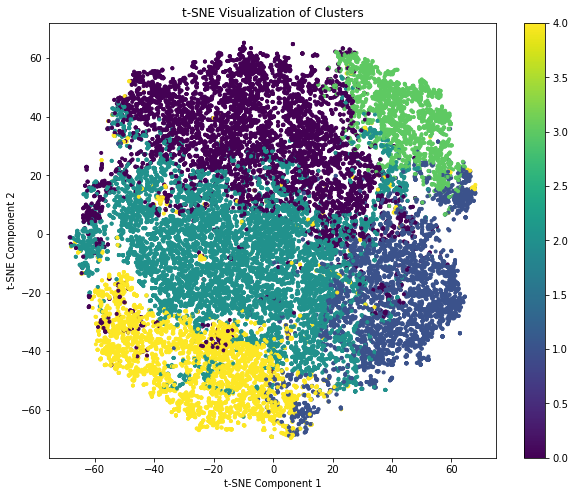

In [28]:
# TODO: Write your code here

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(principal_components_df.values)

# Create a DataFrame with the t-SNE results and labels
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['label'], cmap='viridis', marker='.')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()